In [117]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from keras.utils import to_categorical
from keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from keras import optimizers
from sklearn.metrics import confusion_matrix
import os, shutil

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Assignment 6.1

## Training the convnet on MNIST images

In [2]:
# load the dataset 

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [11]:
# display shape of train and test images

train_images.shape
test_images.shape

(60000, 28, 28)

(10000, 28, 28)

In [12]:
# reshape and change type of data

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [14]:
# Instantiating a  convnet model

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [15]:
# Adding a classifier on top of the convnet

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [16]:
# split the model into train and validation

x_val = train_images[:10000]
partial_x_train = train_images[10000:]
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

#### Compile the model

In [17]:

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
# train the model

history = model.fit(partial_x_train, partial_y_train, epochs=5, batch_size=64,validation_data=(x_val, y_val))

Epoch 1/5
782/782 [==============================] - 13s 16ms/step - loss: 0.1810 - accuracy: 0.9436 - val_loss: 0.0675 - val_accuracy: 0.9790
Epoch 2/5
782/782 [==============================] - 12s 15ms/step - loss: 0.0494 - accuracy: 0.9849 - val_loss: 0.0676 - val_accuracy: 0.9799
Epoch 3/5
782/782 [==============================] - 11s 15ms/step - loss: 0.0347 - accuracy: 0.9888 - val_loss: 0.0509 - val_accuracy: 0.9859
Epoch 4/5
782/782 [==============================] - 12s 15ms/step - loss: 0.0253 - accuracy: 0.9922 - val_loss: 0.0429 - val_accuracy: 0.9898
Epoch 5/5
782/782 [==============================] - 11s 14ms/step - loss: 0.0203 - accuracy: 0.9937 - val_loss: 0.0422 - val_accuracy: 0.9903


In [19]:
#  see the training history

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### Plotting the training and validation loss

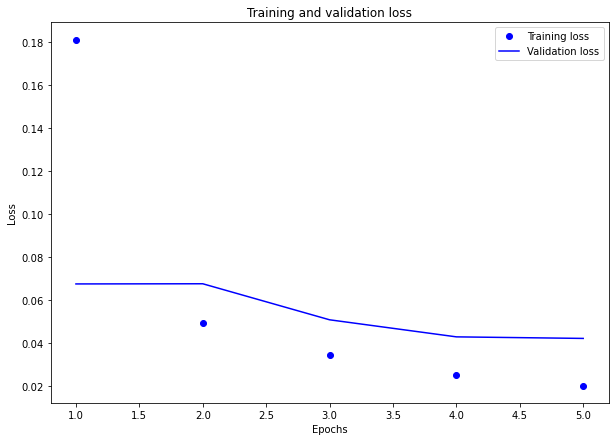

In [22]:
plt.figure(figsize=(10,7))

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show();

#### Plotting the training and validation accuracy

<Figure size 432x288 with 0 Axes>

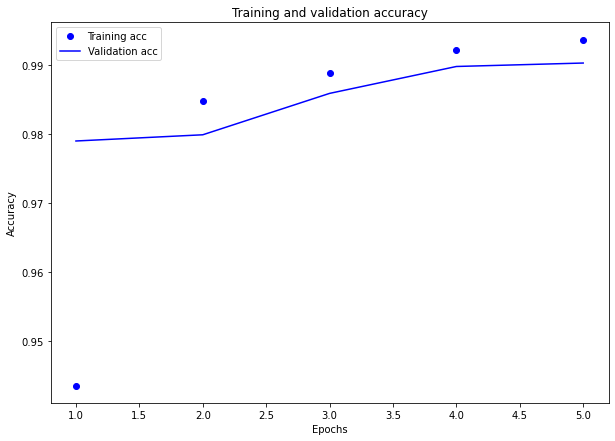

In [23]:
plt.clf()

plt.figure(figsize=(10,7))

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show();

In [24]:
# model evaluation

test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.0301 - accuracy: 0.9907


In [26]:
print(f"The test accuracy of model is {round(test_acc,2)*100}%")

The test accuracy of model is 99.0%


In [25]:
print(f"The test loss of model is {round(test_loss,2)*100}%")

The test loss of model is 3.0%


#### Predictions

In [26]:
model.predict(test_images)[:2]

array([[2.2090586e-11, 1.8616132e-10, 3.5390943e-10, 2.5549870e-08,
        1.4124127e-10, 1.7657896e-11, 4.3463734e-14, 1.0000000e+00,
        6.3403292e-09, 2.0779485e-10],
       [2.9272796e-08, 2.0655220e-09, 1.0000000e+00, 2.7207627e-14,
        2.0737308e-11, 1.7768064e-15, 1.1940213e-10, 1.7648501e-11,
        1.9692645e-11, 5.3568993e-14]], dtype=float32)

## END

-----
-----

# Assignment 6.2.a

In [147]:
# load the data 

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [148]:
# display number of images in each data set

x_train.shape
x_test.shape
y_train.shape
y_test.shape

(50000, 32, 32, 3)

(10000, 32, 32, 3)

(50000, 1)

(10000, 1)

In [127]:
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

#### Data Preparation

In [100]:
# split data into train and validation

# Scale the data
x_train = x_train.astype('float32') / 255.0
x_test =x_test.astype('float32') / 255.0

# Transform target variable into one-hotencoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [101]:
x_train.shape
x_test.shape
y_train.shape
y_test.shape
partial_y_train.shape
partial_x_train.shape

(50000, 32, 32, 3)

(10000, 32, 32, 3)

(50000, 10)

(10000, 10)

(40000, 10)

(40000, 32, 32, 3)

#### Build the model

In [105]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                        input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='sigmoid'))

In [106]:
# display model summary

model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 4, 4, 128)       

In [107]:
# complie the model

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

#### Train the model

In [108]:
history = model.fit(
      partial_x_train,partial_y_train,
      epochs=30,
      batch_size=64,
      validation_data=(x_val,y_val),
      validation_steps=50)

Epoch 1/30
625/625 [==============================] - 23s 37ms/step - loss: 0.2936 - acc: 0.2881 - val_loss: 0.2622 - val_acc: 0.3825
Epoch 2/30
625/625 [==============================] - 26s 42ms/step - loss: 0.2510 - acc: 0.4064 - val_loss: 0.2365 - val_acc: 0.4431
Epoch 3/30
625/625 [==============================] - 23s 37ms/step - loss: 0.2347 - acc: 0.4546 - val_loss: 0.2270 - val_acc: 0.4781
Epoch 4/30
625/625 [==============================] - 19s 30ms/step - loss: 0.2226 - acc: 0.4892 - val_loss: 0.2135 - val_acc: 0.5266
Epoch 5/30
625/625 [==============================] - 19s 30ms/step - loss: 0.2127 - acc: 0.5192 - val_loss: 0.2056 - val_acc: 0.5441
Epoch 6/30
625/625 [==============================] - 19s 30ms/step - loss: 0.2044 - acc: 0.5440 - val_loss: 0.2060 - val_acc: 0.5278
Epoch 7/30
625/625 [==============================] - 19s 30ms/step - loss: 0.1968 - acc: 0.5652 - val_loss: 0.1959 - val_acc: 0.5697
Epoch 8/30
625/625 [==============================] - 19s 30ms

#### save the model

In [109]:
model.save('cnn_classifier_1.h5')

#### plot the training vs validation -   loss and accuracy

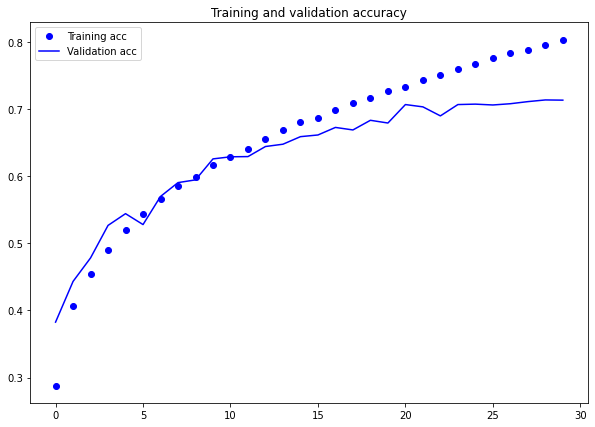

<Figure size 432x288 with 0 Axes>

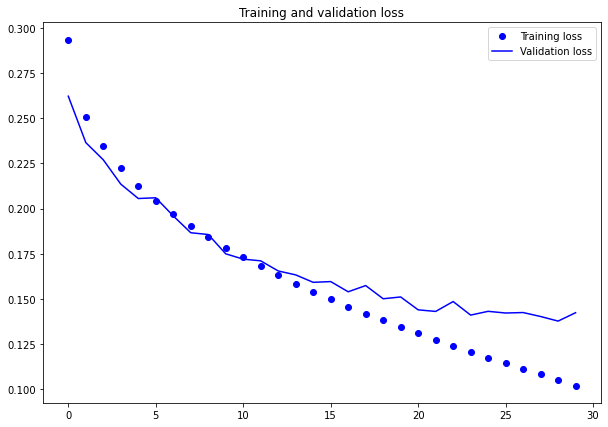

In [110]:
plt.figure(figsize=(10,7))

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()


plt.figure()
plt.figure(figsize=(10,7))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show();

In [111]:
results = model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.1478 - acc: 0.7053


In [113]:
print(f"The accuracy of the model is {round(results[1],2)*100}%")

The accuracy of the model is 71.0%


In [125]:
# Predicting test data

y_pred_test = model.predict(x_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

In [134]:
# reverse y_test from categorical 

# y_test_ = np.argmax(to_categorical(y_test,10) ,axis=1)

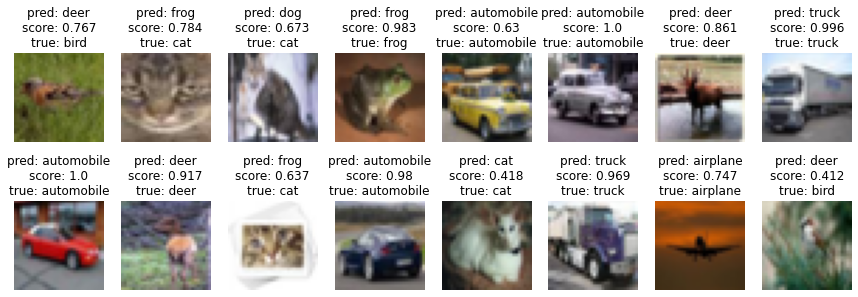

In [150]:
# display the predictions

cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_test[random_index, :])
        pred_label =  cifar10_classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = cifar10_classes[y_test[random_index, 0]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show();

## END

# Assignment 6.2.b

In [184]:
# load the data 

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [155]:
# split data into train and validation

# Scale the data
x_train = x_train.astype('float32') / 255.0
x_test =x_test.astype('float32') / 255.0

# Transform target variable into one-hotencoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [174]:
# build the model 

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same',
                        input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [175]:
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(partial_x_train, partial_y_train, batch_size)

In [178]:
#  train the model using data augmentation and dropout:

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=(x_test, y_test))

Epoch 1/30
100/100 [==============================] - 5s 51ms/step - loss: 1.5609 - acc: 0.4231 - val_loss: 1.5352 - val_acc: 0.4421
Epoch 2/30
100/100 [==============================] - 5s 50ms/step - loss: 1.5693 - acc: 0.4166 - val_loss: 1.4651 - val_acc: 0.4638
Epoch 3/30
100/100 [==============================] - 5s 51ms/step - loss: 1.5583 - acc: 0.4244 - val_loss: 1.4842 - val_acc: 0.4517
Epoch 4/30
100/100 [==============================] - 5s 51ms/step - loss: 1.5472 - acc: 0.4378 - val_loss: 1.4907 - val_acc: 0.4548
Epoch 5/30
100/100 [==============================] - 5s 50ms/step - loss: 1.5270 - acc: 0.4472 - val_loss: 1.4210 - val_acc: 0.4778
Epoch 6/30
100/100 [==============================] - 5s 51ms/step - loss: 1.5735 - acc: 0.4263 - val_loss: 1.4898 - val_acc: 0.4602
Epoch 7/30
100/100 [==============================] - 5s 50ms/step - loss: 1.5511 - acc: 0.4328 - val_loss: 1.4601 - val_acc: 0.4639
Epoch 8/30
100/100 [==============================] - 5s 51ms/step - 

In [179]:
#  save the model

model.save('cnn_classifier_2.h5')

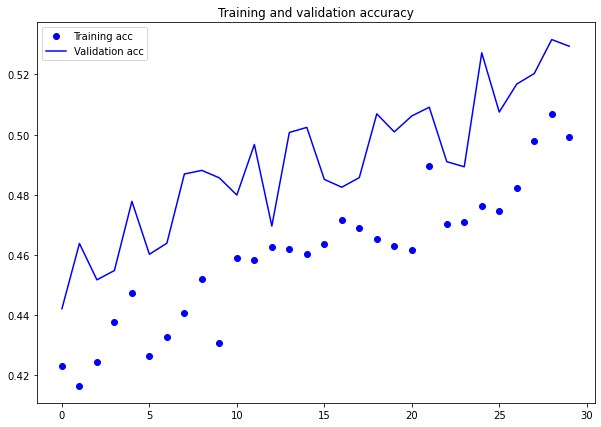

<Figure size 432x288 with 0 Axes>

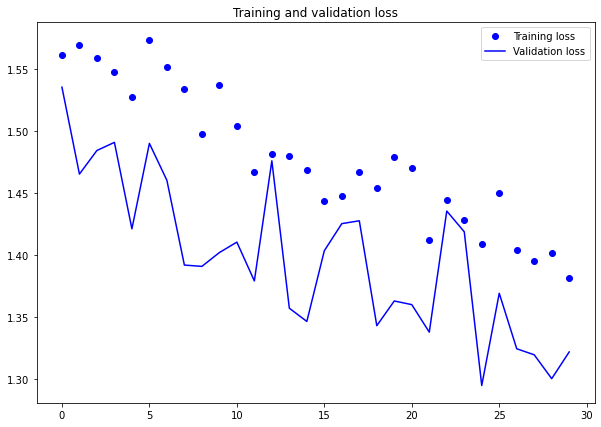

In [180]:
# Plot the training vs validation - accuracy and loss

plt.figure(figsize=(10,7))
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.figure(figsize=(10,7))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show();

In [181]:
results = model.evaluate(x_test, y_test)

print(f"The accuracy of the model is {round(results[1],2)*100}%")

313/313 [==============================] - 2s 7ms/step - loss: 1.3218 - acc: 0.5294
The accuracy of the model is 53.0%


In [182]:
# Predicting test data

y_pred_test = model.predict(x_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

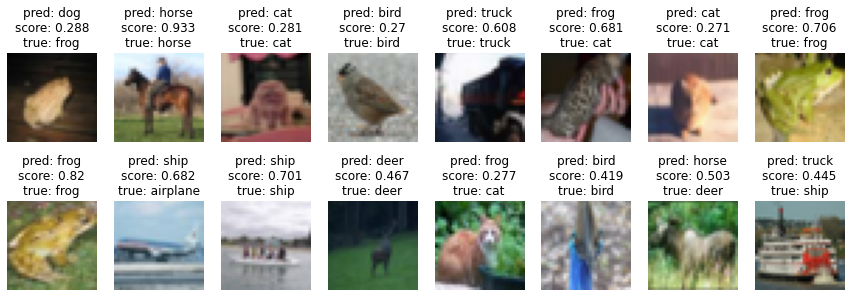

In [185]:
# display the predictions

cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_test[random_index, :])
        pred_label =  cifar10_classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = cifar10_classes[y_test[random_index, 0]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show();

## END

--------------
--------------

# Assignment 6.3